In [31]:
import pandas as pd
product_df = pd.read_json("data/products_table_clean.json")


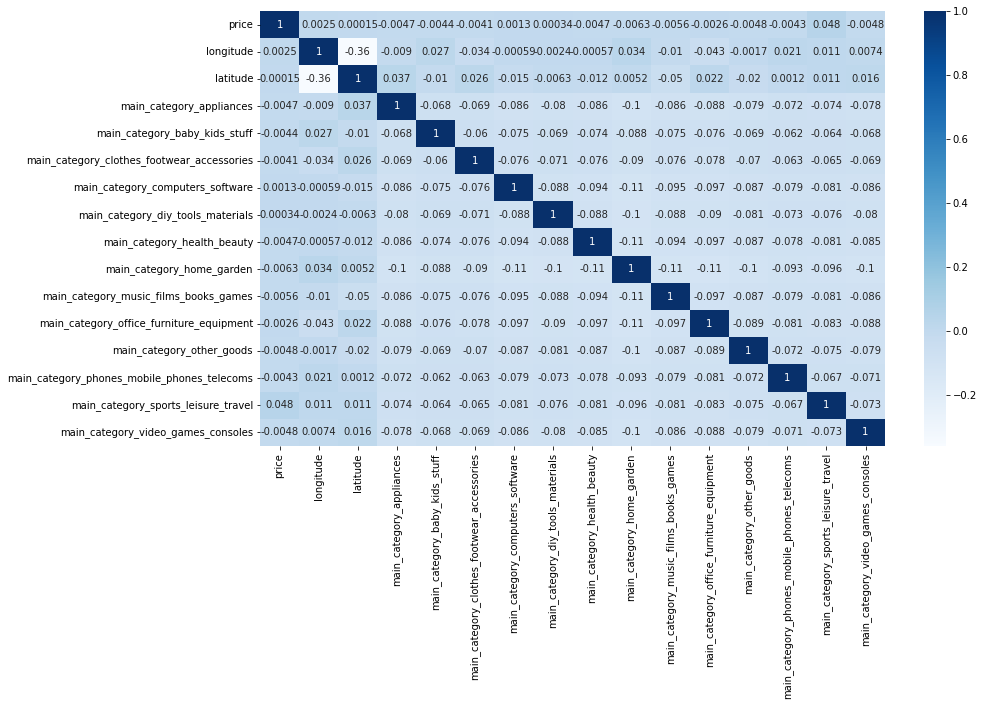

In [33]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
corr = product_df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues")


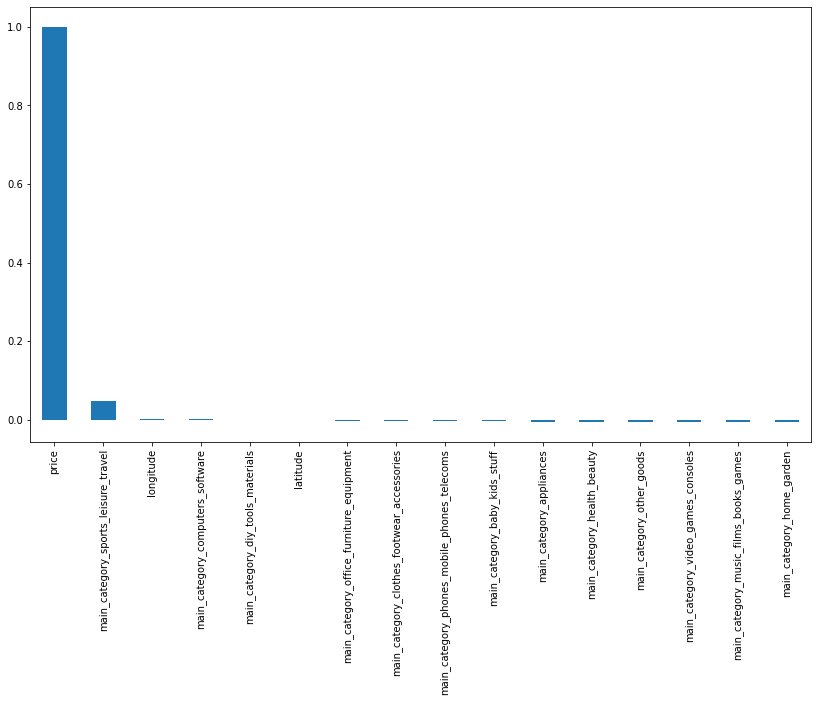

In [34]:
plt.figure(figsize=(14,8))
bars = product_df.corr()['price'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

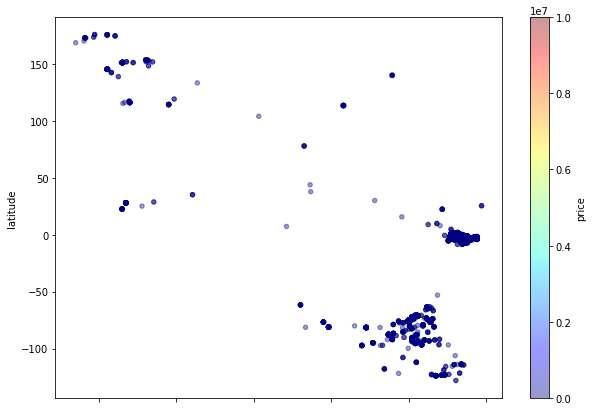

In [37]:
product_df.plot(
    x='longitude', y='latitude',
    kind='scatter', figsize=(10,7),
    alpha=.4,
    c='price', cmap=plt.get_cmap('jet'), colorbar=True
)


In [43]:
X = product_df.drop(["category","location", "main_category", "price"], axis=1)
y = product_df["price"]

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [55]:
y_pred = model.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error
import numpy as np

print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))) 

RMSE:  215765.15969633675


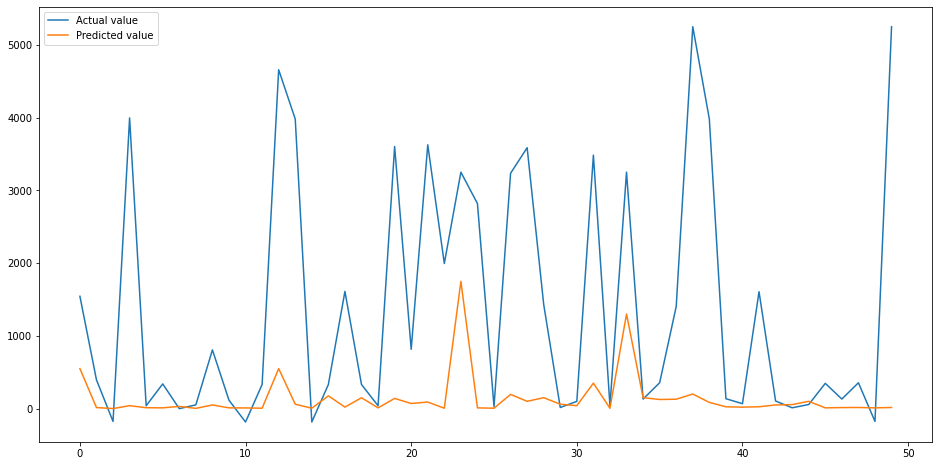

In [58]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])
